In [1]:
from pyspark.sql import SparkSession 

In [2]:
spark = SparkSession.builder.appName ('ml-heart'). getOrCreate() 

21/12/06 19:27:37 WARN Utils: Your hostname, linda-Tete resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
21/12/06 19:27:37 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/12/06 19:27:38 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
df = spark.read.csv ('heart_failure_clinical_records_dataset.csv', header = True, inferSchema = True) 

In [4]:
df.printSchema()

root
 |-- age: double (nullable = true)
 |-- anaemia: integer (nullable = true)
 |-- creatinine_phosphokinase: integer (nullable = true)
 |-- diabetes: integer (nullable = true)
 |-- ejection_fraction: integer (nullable = true)
 |-- high_blood_pressure: integer (nullable = true)
 |-- platelets: double (nullable = true)
 |-- serum_creatinine: double (nullable = true)
 |-- serum_sodium: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- smoking: integer (nullable = true)
 |-- time: integer (nullable = true)
 |-- DEATH_EVENT: integer (nullable = true)



In [5]:
import pandas as pd 

In [6]:
pd.DataFrame(df.take(5), columns = df.columns) .transpose()

,0,1,2,3,4
age,75.0,55.00,65.0,50.0,65.0
anaemia,0.0,0.00,0.0,1.0,1.0
creatinine_phosphokinase,582.0,7861.00,146.0,111.0,160.0
diabetes,0.0,0.00,0.0,0.0,1.0
ejection_fraction,20.0,38.00,20.0,20.0,20.0
high_blood_pressure,1.0,0.00,0.0,0.0,0.0
platelets,265000.0,263358.03,162000.0,210000.0,327000.0
serum_creatinine,1.9,1.10,1.3,1.9,2.7
serum_sodium,130.0,136.00,129.0,137.0,116.0
sex,1.0,1.00,1.0,1.0,0.0


In [7]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int' or t[1] == 'double']

In [8]:
df.select(numeric_features).describe().toPandas().transpose()


,0,1,2,3,4
summary,count,mean,stddev,min,max
age,299,60.83389297658862,11.894809074044469,40.0,95.0
anaemia,299,0.431438127090301,0.4961072681330795,0,1
creatinine_phosphokinase,299,581.8394648829432,970.2878807124358,23,7861
diabetes,299,0.4180602006688963,0.4940670651036091,0,1
ejection_fraction,299,38.08361204013378,11.834840741039168,14,80
high_blood_pressure,299,0.3511705685618729,0.4781363790627446,0,1
platelets,299,263358.02926421416,97804.2368685983,25100.0,850000.0
serum_creatinine,299,1.393879598662207,1.0345100640898544,0.5,9.4
serum_sodium,299,136.62541806020067,4.412477283909232,113,148


In [9]:
from pyspark.sql.functions import corr

In [10]:
df.select(corr('age', 'anaemia')).show()
df.select(corr('age', 'diabetes')).show()
df.select(corr('age', 'smoking')).show()
df.select(corr('age', 'high_blood_pressure')).show()
df.select(corr('sex', 'ejection_fraction')).show()
df.select(corr('sex', 'serum_sodium')).show()


+------------------+
|corr(age, anaemia)|
+------------------+
|0.0880064413193916|
+------------------+

+--------------------+
| corr(age, diabetes)|
+--------------------+
|-0.10101238518196966|
+--------------------+

+--------------------+
|  corr(age, smoking)|
+--------------------+
|0.018667867990770408|
+--------------------+

+------------------------------+
|corr(age, high_blood_pressure)|
+------------------------------+
|           0.09328868460631876|
+------------------------------+

+----------------------------+
|corr(sex, ejection_fraction)|
+----------------------------+
|        -0.14838596532635925|
+----------------------------+

+-----------------------+
|corr(sex, serum_sodium)|
+-----------------------+
|   -0.02756612272823...|
+-----------------------+



In [11]:
df = df.select('age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 
'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking',
'time', 'DEATH_EVENT')
cols = df.columns
df.printSchema()

root
 |-- age: double (nullable = true)
 |-- anaemia: integer (nullable = true)
 |-- creatinine_phosphokinase: integer (nullable = true)
 |-- diabetes: integer (nullable = true)
 |-- ejection_fraction: integer (nullable = true)
 |-- high_blood_pressure: integer (nullable = true)
 |-- platelets: double (nullable = true)
 |-- serum_creatinine: double (nullable = true)
 |-- serum_sodium: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- smoking: integer (nullable = true)
 |-- time: integer (nullable = true)
 |-- DEATH_EVENT: integer (nullable = true)



In [12]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

In [13]:
pd.DataFrame(df.take(5), columns = df.columns) .transpose()

,0,1,2,3,4
age,75.0,55.00,65.0,50.0,65.0
anaemia,0.0,0.00,0.0,1.0,1.0
creatinine_phosphokinase,582.0,7861.00,146.0,111.0,160.0
diabetes,0.0,0.00,0.0,0.0,1.0
ejection_fraction,20.0,38.00,20.0,20.0,20.0
high_blood_pressure,1.0,0.00,0.0,0.0,0.0
platelets,265000.0,263358.03,162000.0,210000.0,327000.0
serum_creatinine,1.9,1.10,1.3,1.9,2.7
serum_sodium,130.0,136.00,129.0,137.0,116.0
sex,1.0,1.00,1.0,1.0,0.0


In [14]:
anemiaVec = OneHotEncoder(inputCol='anaemia', outputCol='anaemiaVec')
diabetesVec = OneHotEncoder(inputCol='diabetes', outputCol='diabetesVec')
high_blood_pressureVec = OneHotEncoder(inputCol='high_blood_pressure', outputCol='high_blood_pressureVec')
sexVec = OneHotEncoder(inputCol='sex', outputCol='sexVec')
smokingVec = OneHotEncoder(inputCol='smoking', outputCol='smokingVec')


In [15]:
label_stringIdx = StringIndexer(inputCol = 'DEATH_EVENT', outputCol = 'label')

In [16]:
assembler = VectorAssembler(inputCols=['anaemiaVec',
                                      'diabetesVec',
                                      'high_blood_pressureVec',
                                      'sexVec',
                                      'smokingVec',
                                      'age',
                                      'creatinine_phosphokinase',
                                      'ejection_fraction','platelets',
                                       'serum_creatinine','time'
                                      ], outputCol='features')

In [17]:
from pyspark.ml import Pipeline

In [18]:
from pyspark.ml.classification import LogisticRegression

In [19]:
pipeline = Pipeline(stages=[anemiaVec,diabetesVec,
                            high_blood_pressureVec, 
                            sexVec,smokingVec,assembler,
                            label_stringIdx])

In [20]:
pipelineModel = pipeline.fit(df)

In [21]:
df = pipelineModel.transform(df)

In [22]:
selectedCols = ['label', 'features']+cols

In [23]:
df = df.select(selectedCols)

In [24]:
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- age: double (nullable = true)
 |-- anaemia: integer (nullable = true)
 |-- creatinine_phosphokinase: integer (nullable = true)
 |-- diabetes: integer (nullable = true)
 |-- ejection_fraction: integer (nullable = true)
 |-- high_blood_pressure: integer (nullable = true)
 |-- platelets: double (nullable = true)
 |-- serum_creatinine: double (nullable = true)
 |-- serum_sodium: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- smoking: integer (nullable = true)
 |-- time: integer (nullable = true)
 |-- DEATH_EVENT: integer (nullable = true)



In [25]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
label,1.0,1.0,1.0,1.0,1.0
features,"[1.0, 1.0, 0.0, 0.0, 1.0, 75.0, 582.0, 20.0, 2...","[1.0, 1.0, 1.0, 0.0, 1.0, 55.0, 7861.0, 38.0, ...","[1.0, 1.0, 1.0, 0.0, 0.0, 65.0, 146.0, 20.0, 1...","[0.0, 1.0, 1.0, 0.0, 1.0, 50.0, 111.0, 20.0, 2...","[0.0, 0.0, 1.0, 1.0, 1.0, 65.0, 160.0, 20.0, 3..."
age,75.0,55.0,65.0,50.0,65.0
anaemia,0,0,0,1,1
creatinine_phosphokinase,582,7861,146,111,160
diabetes,0,0,0,0,1
ejection_fraction,20,38,20,20,20
high_blood_pressure,1,0,0,0,0
platelets,265000.0,263358.03,162000.0,210000.0,327000.0
serum_creatinine,1.9,1.1,1.3,1.9,2.7


In [26]:
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))


Training Dataset Count: 205
Test Dataset Count: 94


In [27]:
#Logistic Regresion Model
train

DataFrame[label: double, features: vector, age: double, anaemia: int, creatinine_phosphokinase: int, diabetes: int, ejection_fraction: int, high_blood_pressure: int, platelets: double, serum_creatinine: double, serum_sodium: int, sex: int, smoking: int, time: int, DEATH_EVENT: int]

In [28]:
from pyspark.ml.classification import LogisticRegression

In [29]:
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)

In [30]:
lrModel = lr.fit(train)


21/12/06 19:28:22 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
21/12/06 19:28:22 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [31]:
import matplotlib.pyplot as plt
import numpy as np


In [32]:
beta = np.sort(lrModel.coefficients)

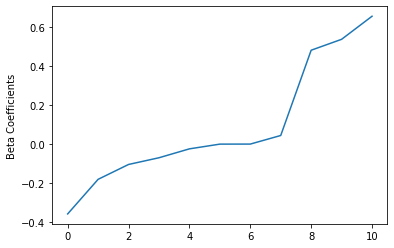

In [33]:
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

In [34]:
#ROC curve

In [35]:
trainingSummary = lrModel.summary


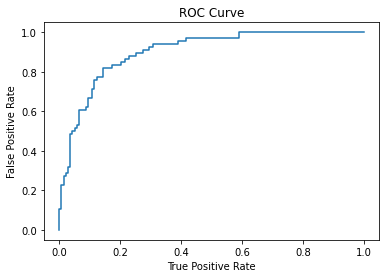

Training set areaUnderROC: 0.900370612600828


In [36]:
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))


In [37]:
#Precision y Reacall

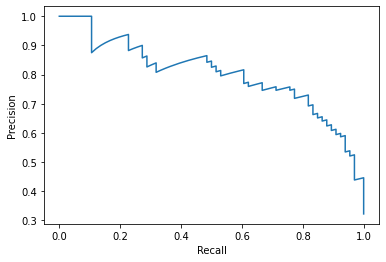

In [38]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [39]:
#hacer predicciones

In [40]:
predictions = lrModel.transform(test)
predictions.select('age', 'sex', 'label', 'rawPrediction', 'prediction', 'probability').show(10)
predictions.describe()

+------+---+-----+--------------------+----------+--------------------+
|   age|sex|label|       rawPrediction|prediction|         probability|
+------+---+-----+--------------------+----------+--------------------+
|  52.0|  1|  0.0|[4.00346949088294...|       0.0|[0.98207496826377...|
|60.667|  0|  0.0|[2.97006215726207...|       0.0|[0.95120316215534...|
|  51.0|  1|  0.0|[1.81687946714752...|       0.0|[0.86019126637456...|
|  60.0|  1|  0.0|[3.94249338684036...|       0.0|[0.98096940616800...|
|  45.0|  1|  0.0|[0.99521832751170...|       0.0|[0.73011740670076...|
|  55.0|  1|  0.0|[4.96196795457208...|       0.0|[0.99304950719388...|
|  61.0|  1|  0.0|[3.57953979127000...|       0.0|[0.97286813789870...|
|  60.0|  0|  0.0|[2.35219431390432...|       0.0|[0.91310848534455...|
|  65.0|  0|  0.0|[2.22107089842069...|       0.0|[0.90212579124293...|
|  65.0|  0|  0.0|[3.05967285719216...|       0.0|[0.95519829911915...|
+------+---+-----+--------------------+----------+--------------

DataFrame[summary: string, label: string, age: string, anaemia: string, creatinine_phosphokinase: string, diabetes: string, ejection_fraction: string, high_blood_pressure: string, platelets: string, serum_creatinine: string, serum_sodium: string, sex: string, smoking: string, time: string, DEATH_EVENT: string, prediction: string]

In [41]:
#Evaluar modelo de Regresion lineal
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [42]:
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.8807291666666667


In [43]:
#Gradient-Boosted Tree Classifier

In [44]:
from pyspark.ml.classification import GBTClassifier

In [45]:
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)
predictions = gbtModel.transform(test)
predictions.select('age', 'sex', 'label', 'rawPrediction', 'prediction', 'probability').show(50)


+------+---+-----+--------------------+----------+--------------------+
|   age|sex|label|       rawPrediction|prediction|         probability|
+------+---+-----+--------------------+----------+--------------------+
|  52.0|  1|  0.0|[1.28779541937372...|       0.0|[0.92927403016611...|
|60.667|  0|  0.0|[0.67494220494885...|       0.0|[0.79411072998945...|
|  51.0|  1|  0.0|[1.33173294712193...|       0.0|[0.93483611882667...|
|  60.0|  1|  0.0|[1.22087688219462...|       0.0|[0.91995632437433...|
|  45.0|  1|  0.0|[1.39830184481046...|       0.0|[0.94249201772143...|
|  55.0|  1|  0.0|[1.28986669382198...|       0.0|[0.92954581055773...|
|  61.0|  1|  0.0|[1.32436551137136...|       0.0|[0.93393273469173...|
|  60.0|  0|  0.0|[1.31697015142938...|       0.0|[0.93301423368903...|
|  65.0|  0|  0.0|[1.32098529122783...|       0.0|[0.93351437372379...|
|  65.0|  0|  0.0|[1.31697015142938...|       0.0|[0.93301423368903...|
|  53.0|  1|  0.0|[1.33713823978417...|       0.0|[0.93549158557

In [46]:
predictions.select('sex', 'time','prediction', 'probability').show(10)


+---+----+----------+--------------------+
|sex|time|prediction|         probability|
+---+----+----------+--------------------+
|  1| 216|       0.0|[0.92927403016611...|
|  0| 172|       0.0|[0.79411072998945...|
|  1| 145|       0.0|[0.93483611882667...|
|  1| 245|       0.0|[0.91995632437433...|
|  1|  88|       0.0|[0.94249201772143...|
|  1| 250|       0.0|[0.92954581055773...|
|  1| 213|       0.0|[0.93393273469173...|
|  0| 187|       0.0|[0.93301423368903...|
|  0| 107|       0.0|[0.93351437372379...|
|  0| 210|       0.0|[0.93301423368903...|
+---+----+----------+--------------------+
only showing top 10 rows



In [47]:
#evaluar Gradient Boosted Tree Classifier

In [48]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8742187499999998


In [49]:

print(gbtModel)
print('*************** Tree Summary ***************')
print('No. of classes: ', gbtModel.numClasses)
print('No. of features: ', gbtModel.numFeatures)
print('--------------------------------------------------------')

GBTClassificationModel: uid = GBTClassifier_077303aea20b, numTrees=10, numClasses=2, numFeatures=11
*************** Tree Summary ***************
No. of classes:  2
No. of features:  11
--------------------------------------------------------


In [50]:
print(gbt.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 

In [51]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

In [52]:
#Ejecutar validaciones cruzadas

In [53]:
cvModel = cv.fit(train)
predictions2 = cvModel.transform(test)
evaluator.evaluate(predictions2)

0.8955729166666667

In [54]:
#conda install -c https://conda.anaconda.org/plotly plotly


In [55]:
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
# from sklearn.svm import SVR
mesh_size = .02
margin = 0

In [56]:
predictions.select('sex','age','prediction', 'probability').show(10)


+---+------+----------+--------------------+
|sex|   age|prediction|         probability|
+---+------+----------+--------------------+
|  1|  52.0|       0.0|[0.92927403016611...|
|  0|60.667|       0.0|[0.79411072998945...|
|  1|  51.0|       0.0|[0.93483611882667...|
|  1|  60.0|       0.0|[0.91995632437433...|
|  1|  45.0|       0.0|[0.94249201772143...|
|  1|  55.0|       0.0|[0.92954581055773...|
|  1|  61.0|       0.0|[0.93393273469173...|
|  0|  60.0|       0.0|[0.93301423368903...|
|  0|  65.0|       0.0|[0.93351437372379...|
|  0|  65.0|       0.0|[0.93301423368903...|
+---+------+----------+--------------------+
only showing top 10 rows



# -------------- Conclusión -------------- 


En primer lugar, debemos saber el motivo de representación para nuestro modelo y el porqué de la información utilizada.
Por esa razón se utilizó la información para crear una predicción sobre la insuficiencia cardíaca, ya que es un evento común causado por las enfermedades cardiovasculares.
La mayoría de las enfermedades cardiovasculares se pueden prevenir abordando los factores de riesgo conductuales como el consumo de tabaco, la dieta poco saludable y la obesidad, la inactividad física y el consumo nocivo de alcohol utilizando estrategias para toda la población.
Las personas con enfermedad cardiovascular o que se encuentran en alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida), por ello con un conjunto de 13 características relacionadas con los puntos anteriores, serán de ayuda para crear nuestro modelo de predicción, probabilidad sobre la mortalidad de insuficiencia cardiaca con nuestro Gradient-boosted-tree-classifier.

Se sabe que para crear y trabajar nuestro modelo se debe realizar un análisis de la información brindada, ya que en primer lugar se debe realizar las predicciones con la Regresion Logistica:

Las columnas de nuestra información eran las siguientes:

•	age: Edad de la persona                         
•	anaemia: Disminución de glóbulos rojos o hemoglobina (booleano)              
•	creatinine_phosphokinase: Nivel de la enzima CPK en sangre (mcg / L)
•	diabetes: Si el paciente tiene diabetes (booleano)                    
•	ejection_fraction: Porcentaje de sangre que sale del corazón en cada contracción (porcentaje)        
•	high_blood_pressure: Si el paciente tiene hipertensión (booleano)        
•	platelets: Plaquetas en la sangre (kiloplaquetas / mL)                  
•	serum_creatinine: Nivel de creatinina sérica en sangre (mg / dL)        
•	serum_sodium: Nivel de sodio sérico en sangre (mEq / L                
•	sex: Mujer u hombre (binario)                       
•	smoking: Si el paciente fuma o no (booleano)
•	time:     Período de seguimiento (días)                  
•	DEATH_EVENT: Si el paciente falleció durante el período
de seguimiento (booleano)                 

De las 13 columnas de información se utilizaron las 12 sin incluir la DEATH_EVENT, ya que esta es nuestra “label”, con los 12 restantes se creó nuestra columna “features”.

Al realizar nuestras columnas correspondientes para nuestra regresión logística, se pudieron visualizar nuestras predicciones para nuestra columna es que las variantes de nuestra label y la predicción son correctas ya que indica si la persona falleció o no, respectivamente de acuerdo a las predicciones.
También se puede visualizar que el porcentaje de predicción de nuestra curva de ROC es de 0.900370612600828 lo que equivale al 90.03% de datos predecibles, lo cual es un porcentaje alto para nuestro modelo además sabemos que el porcentaje de datos del área bajo la curva es de 88.07% 

Las probabilidades establecidas por nuestro modelo con respecto a su Gradient-boosted-tree-classifier se puede visualizar una probabilidad alta con respecto al sexo y edad de la persona, y se supo que, al ser del sexo femenino y mayor de edad, tiene mas probabilidades de padecer insuficiencia cardiaca ya que llega a padecer más enfermedades cardiovasculares, así como también los otros factores que determinar el padecimiento de sufrir esta enfermedad.